# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sheila Dwi Yulianti Saputri
- **Email:** sheilayulianti9@gmail.com
- **ID Dicoding:** sheilaaadys

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda yang kita miliki?
- Bagaimanakah dampak akibat kondisi cuaca pada jumlah pengguna penyewaan sepeda?

## Library/Package yang digunakan

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

## Data Wrangling

### Gathering data

In [9]:
hari_df = pd.read_csv('D:\\DBS Codiing Camp\\dataset proyek akhir\\day.csv')
hari_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
jam_df = pd.read_csv('D:\\DBS Codiing Camp\\dataset proyek akhir\\hour.csv')
jam_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assesing Data

### Menilai table hari_df

In [15]:
hari_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [17]:
hari_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [19]:
print('Jumlah duplikasi: ', hari_df.duplicated().sum())

Jumlah duplikasi:  0


In [21]:
hari_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Menilai table jam_df

In [24]:
jam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [26]:
jam_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [28]:
print('Jumlah duplikasi: ', jam_df.duplicated().sum())

Jumlah duplikasi:  0


In [30]:
jam_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Cleaning Data

### Cleaning data hari_df

In [34]:
hari_df['hum'].value_counts()[0]

1

In [36]:
hari_df = hari_df[hari_df['hum'] != 0]
hari_df.hum.min()

0.187917

In [38]:
hari_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,366.406849,2.498630,0.501370,6.524658,0.028767,2.995890,0.683562,1.393151,0.495530,0.474475,0.628754,0.190388,849.275342,3660.390411,4509.665753
std,211.023699,1.110184,0.500341,3.451815,0.167266,2.005817,0.465405,0.542015,0.183134,0.163040,0.140614,0.077506,686.449738,1557.149836,1933.194931
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,184.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336875,0.337794,0.520521,0.134950,316.250000,2502.250000,3169.750000
50%,366.500000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.499167,0.487364,0.627083,0.180971,717.000000,3664.500000,4548.500000
75%,548.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655625,0.608916,0.730313,0.233207,1096.500000,4783.250000,5966.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [40]:
hari_df['dteday'] = pd.to_datetime(hari_df['dteday'])

In [42]:
hari_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4

**Cleaning data jam_df**

In [45]:
jam_df['hum'].value_counts()[0]

22

In [47]:
jam_df = jam_df[jam_df['hum'] != 0]
jam_df.hum.min()

0.08

In [49]:
jam_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000
mean,8699.034107,2.503543,0.503198,6.542260,11.545889,0.028807,3.002420,0.682318,1.423403,0.497124,0.475889,0.628024,0.190007,35.718788,153.948551,189.667339
std,5013.782462,1.106327,0.500004,3.438645,6.914537,0.167268,2.006728,0.465588,0.637492,0.192635,0.171921,0.191754,0.122342,49.321693,151.382189,181.409297
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4362.000000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8701.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,116.000000,142.000000
75%,13040.000000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [51]:
jam_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17357 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17357 non-null  int64  
 1   dteday      17357 non-null  object 
 2   season      17357 non-null  int64  
 3   yr          17357 non-null  int64  
 4   mnth        17357 non-null  int64  
 5   hr          17357 non-null  int64  
 6   holiday     17357 non-null  int64  
 7   weekday     17357 non-null  int64  
 8   workingday  17357 non-null  int64  
 9   weathersit  17357 non-null  int64  
 10  temp        17357 non-null  float64
 11  atemp       17357 non-null  float64
 12  hum         17357 non-null  float64
 13  windspeed   17357 non-null  float64
 14  casual      17357 non-null  int64  
 15  registered  17357 non-null  int64  
 16  cnt         17357 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.4+ MB


In [53]:
jam_df['dteday'] = pd.to_datetime(jam_df['dteday'])

In [55]:
jam_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17357 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17357 non-null  int64         
 1   dteday      17357 non-null  datetime64[ns]
 2   season      17357 non-null  int64         
 3   yr          17357 non-null  int64         
 4   mnth        17357 non-null  int64         
 5   hr          17357 non-null  int64         
 6   holiday     17357 non-null  int64         
 7   weekday     17357 non-null  int64         
 8   workingday  17357 non-null  int64         
 9   weathersit  17357 non-null  int64         
 10  temp        17357 non-null  float64       
 11  atemp       17357 non-null  float64       
 12  hum         17357 non-null  float64       
 13  windspeed   17357 non-null  float64       
 14  casual      17357 non-null  int64         
 15  registered  17357 non-null  int64         
 16  cnt         17357 non-null 

**Insight:**
- Pada kolom dteday, saya mengganti type data nya dari object ke datetime
- Pada kolom hum, saya menghapus baris baris yang dimana humaditynya itu bernilai 0

## Eksploratory Data Analysis (EDA)

### Eksplore hari_df

In [60]:
hari_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,366.406849,2012-01-01 09:45:51.780822016,2.498630,0.501370,6.524658,0.028767,2.995890,0.683562,1.393151,0.495530,0.474475,0.628754,0.190388,849.275342,3660.390411,4509.665753
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,184.250000,2011-07-03 06:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336875,0.337794,0.520521,0.134950,316.250000,2502.250000,3169.750000
50%,366.500000,2012-01-01 12:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.499167,0.487364,0.627083,0.180971,717.000000,3664.500000,4548.500000
75%,548.750000,2012-07-01 18:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655625,0.608916,0.730313,0.233207,1096.500000,4783.250000,5966.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.023699,NaN,1.110184,0.500341,3.451815,0.167266,2.005817,0.465405,0.542015,0.183134,0.163040,0.140614,0.077506,686.449738,1557.149836,1933.194931


In [62]:
hari_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
556,557,2012-07-10,3,1,7,0,2,1,2,0.720833,0.664796,0.667500,0.151737,954,5336,6290
559,560,2012-07-13,3,1,7,0,5,1,2,0.731667,0.667933,0.485833,0.080850,1511,5988,7499
704,705,2012-12-05,4,1,12,0,3,1,1,0.438333,0.428012,0.485000,0.324021,331,5398,5729
638,639,2012-09-30,4,1,9,0,0,0,1,0.526667,0.517663,0.583333,0.134958,2015,4874,6889
359,360,2011-12-26,1,0,12,1,1,0,1,0.321739,0.315535,0.506957,0.239465,430,887,1317
654,655,2012-10-16,4,1,10,0,2,1,1,0.468333,0.460846,0.558333,0.182221,922,6612,7534
382,383,2012-01-18,1,1,1,0,3,1,1,0.303333,0.275254,0.443333,0.415429,109,3267,3376
539,540,2012-06-23,3,1,6,0,6,0,1,0.731667,0.652792,0.534583,0.179721,2657,4801,7458
18,19,2011-01-19,1,0,1,0,3,1,2,0.292174,0.298422,0.741739,0.208317,78,1572,1650
621,622,2012-09-13,3,1,9,0,4,1,1,0.612500,0.579558,0.637083,0.082721,1054,6750,7804


In [64]:
hari_df.groupby('holiday')['cnt'].mean()

holiday
0    4532.610719
1    3735.000000
Name: cnt, dtype: float64

In [66]:
hari_df.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "std", ]
})
     

cnt                                
         max   min         mean          std
season                                      
1       7836   431  2615.138889  1395.972134
2       8362   795  4992.331522  1695.977235
3       8714  1115  5644.303191  1459.800381
4       8555    22  4728.162921  1699.615261

In [68]:
hari_df.groupby('holiday')['cnt'].agg(['count', 'sum', 'mean'])

,count,sum,mean
holiday,,,
0,709,3213621,4532.610719
1,21,78435,3735.000000


In [70]:
hari_df.groupby('weekday')['cnt'].agg(['sum', 'mean']).sort_values('sum', ascending=False)

,sum,mean
weekday,,
5,487790,4690.288462
4,484772,4706.524272
6,477807,4550.542857
3,473048,4548.538462
2,469109,4510.663462
1,455503,4338.123810
0,444027,4228.828571


## Eksplore jam_df

In [73]:
jam_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
7098,7099,2011-10-28,4,0,10,9,0,5,1,1,0.32,0.3030,0.57,0.2239,19,210,229
16995,16996,2012-12-15,4,1,12,22,0,6,0,1,0.36,0.3485,0.62,0.1940,22,134,156
11185,11186,2012-04-16,2,1,4,6,1,1,0,1,0.52,0.5000,0.83,0.1642,10,123,133
688,689,2011-02-01,1,0,2,0,0,2,1,2,0.16,0.1818,0.64,0.1045,2,6,8
5908,5909,2011-09-08,3,0,9,17,0,4,1,3,0.64,0.5606,0.94,0.2836,11,102,113
3329,3330,2011-05-23,2,0,5,15,0,1,1,2,0.72,0.6818,0.62,0.4478,57,119,176
12505,12506,2012-06-10,2,1,6,6,0,0,0,1,0.62,0.5909,0.73,0.0000,3,27,30
9983,9984,2012-02-26,1,1,2,0,0,0,0,1,0.24,0.2121,0.41,0.3582,7,63,70
6734,6735,2011-10-13,4,0,10,4,0,4,1,2,0.54,0.5152,1.00,0.1045,2,5,7
4183,4184,2011-06-28,3,0,6,5,0,2,1,1,0.66,0.6061,0.78,0.0000,1,20,21


In [75]:
jam_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17357.000000,17357,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000
mean,8699.034107,2012-01-02 13:12:48.035950848,2.503543,0.503198,6.542260,11.545889,0.028807,3.002420,0.682318,1.423403,0.497124,0.475889,0.628024,0.190007,35.718788,153.948551,189.667339
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4362.000000,2011-07-05 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8701.000000,2012-01-03 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,116.000000,142.000000
75%,13040.000000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5013.782462,NaN,1.106327,0.500004,3.438645,6.914537,0.167268,2.006728,0.465588,0.637492,0.192635,0.171921,0.191754,0.122342,49.321693,151.382189,181.409297


In [77]:
jam_df[['casual', 'registered']].mean()

casual         35.718788
registered    153.948551
dtype: float64

In [79]:
jam_df.groupby('hr')['cnt'].sum().sort_values(ascending=False)

hr
17    336749
18    309690
8     260957
16    227727
19    226733
13    184907
12    184380
15    183135
14    175640
20    164512
9     159414
7     154134
11    151309
10    126240
21    125417
22     95578
23     63914
6      55120
0      39127
1      24162
2      16351
5      14258
3       8174
4       4428
Name: cnt, dtype: int64

**Insight:**
- Pada table hari_df, saya mengeksplore informasi mengenai season, holiday, dan weekday. 
- Pada table jam_df, saya mencari tahu informasi mengenai jam penyewaan orang-orang menyewa sepeda memakai akun yang terdaftar atau tidak

## Visualization & Eksplanatory Analysis

### Bagaimana tren penyewaan sepeda yang kita miliki?

#### Berdasarkan musim (season)

In [85]:
byseasonday_df = hari_df.groupby(by='season')['cnt'].sum().reset_index()
byseasonday_df.rename(columns={
    'cnt': 'total_sewa'
}, inplace=True)

byseasonday_df

,season,total_sewa
0,1,470725
1,2,918589
2,3,1061129
3,4,841613


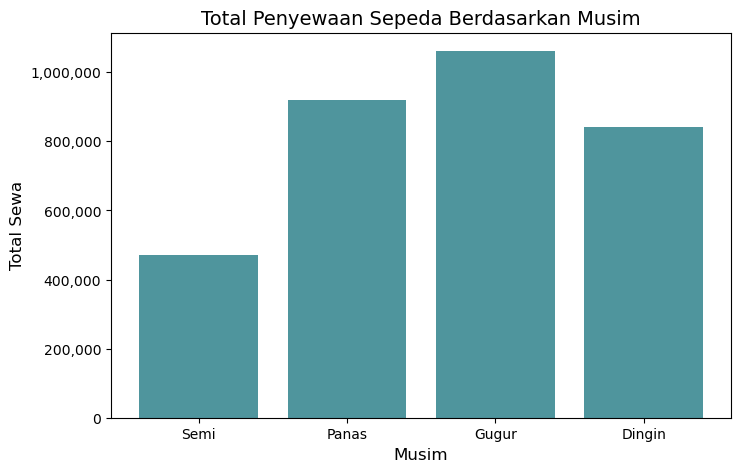

In [87]:
season_labels = {1:'Semi', 2:'Panas', 3:'Gugur', 4:'Dingin'}
byseasonday_df['season'] = byseasonday_df['season'].replace(season_labels)

plt.figure(figsize=(8,5))
plt.bar(
    byseasonday_df['season'], 
    byseasonday_df['total_sewa'], 
    color='#4F959D')

plt.title('Total Penyewaan Sepeda Berdasarkan Musim', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Total Sewa', fontsize=12)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

#### Berdasarkan weekday

In [90]:
byweekday_df = jam_df.groupby(by='weekday')['cnt'].mean().reset_index()
byweekday_df.rename(columns={
    'cnt': 'rata_sewa'
}, inplace=True)

byweekday_df

,weekday,rata_sewa
0,0,177.468825
1,1,183.744655
2,2,191.238891
3,3,191.130505
4,4,197.946917
5,5,196.135907
6,6,190.209793


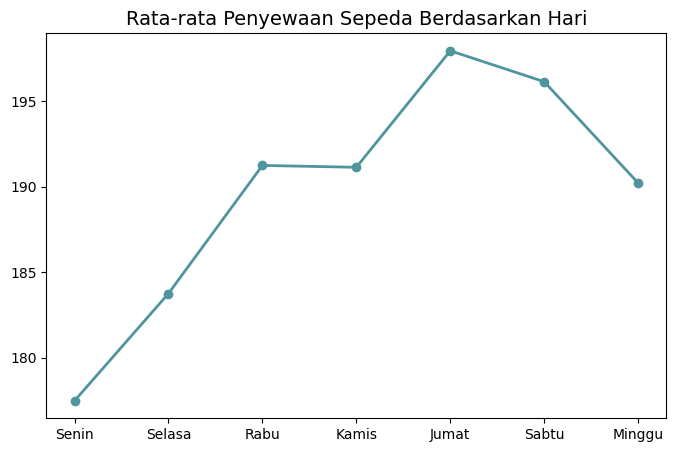

In [92]:
weekday_labels = {0:'Senin', 1:'Selasa', 2:'Rabu', 3:'Kamis', 4:'Jumat', 5:'Sabtu', 6:'Minggu'}
byweekday_df['weekday'] = byweekday_df['weekday'].replace(weekday_labels)

plt.figure(figsize=(8,5))
plt.plot(
    byweekday_df['weekday'], 
    byweekday_df['rata_sewa'], 
    marker = 'o',
    linewidth = 2,
    color='#4F959D')

plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Hari', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Berdasarkan Jam

In [95]:
byhour_df = jam_df.groupby(by='hr')['cnt'].mean().reset_index()
byhour_df.rename(columns={
    'cnt': 'rata_sewa'
}, inplace=True)

byhour_df

,hr,rata_sewa
0,0,53.968276
1,1,33.419087
2,2,22.900560
3,3,11.727403
4,4,6.352941
5,5,19.913408
6,6,76.132597
7,7,212.305785
8,8,359.444904
9,9,219.578512


In [97]:
sorting = byhour_df.sort_values(by='rata_sewa', ascending=False)
highest = sorting.head(10)
highest

,hr,rata_sewa
17,17,461.932785
18,18,425.983494
8,8,359.444904
16,16,312.382716
19,19,311.874828
13,13,253.993132
12,12,253.617607
15,15,251.559066
14,14,241.263736
20,20,226.288858


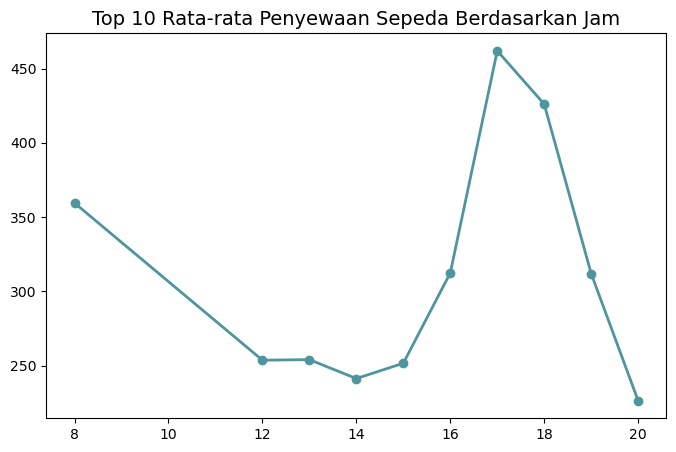

In [99]:
highest = highest.sort_values(by='hr')

plt.figure(figsize=(8,5))
plt.plot(
    highest['hr'], 
    highest['rata_sewa'], 
    marker = 'o',
    linewidth = 2,
    color='#4F959D')

plt.title('Top 10 Rata-rata Penyewaan Sepeda Berdasarkan Jam', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Bagaimanakah dampak akibat kondisi cuaca pada jumlah pengguna penyewaan sepeda?

In [102]:
byweathersit_df = jam_df.groupby(by='weathersit')['cnt'].mean().reset_index()
byweathersit_df.rename(columns={
    'cnt': 'mean_sewa'
}, inplace=True)

byweathersit_df

,weathersit,mean_sewa
0,1,204.869272
1,2,175.210700
2,3,112.832738
3,4,74.333333


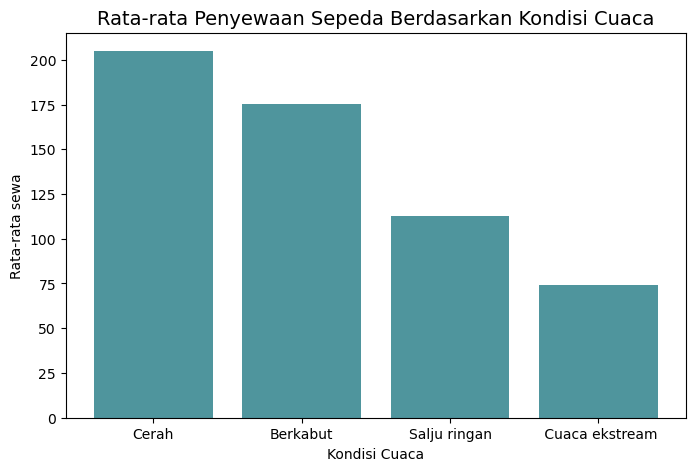

In [104]:
weather_labels = {1:'Cerah', 2:'Berkabut', 3:'Salju ringan', 4:' Cuaca ekstream'}
byweathersit_df['weathersit'] = byweathersit_df['weathersit'].replace(weather_labels)

plt.figure(figsize=(8,5))
plt.bar(
    byweathersit_df['weathersit'], 
    byweathersit_df['mean_sewa'], 
    color='#4F959D')

plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca', fontsize=14)
plt.xlabel("Kondisi Cuaca", fontsize=10)
plt.ylabel("Rata-rata sewa", fontsize=10)
plt.show()

## Conclusion

- Jadi, tren penyewaan sepeda yang dimiliki itu dibagi atas tiga, yang pertama berdasarkan season, pada season itu menunjukkan bahwa pada musim gugur adalah musim yang paling banyak menghasilkan penyewaan sepeda. Kedua berdasarkan hari, bisa dilihat dari visualisasinya bahwa rata-rata orang menyewa sepeda itu pada hari jumat. Dan ketiga, berdasarkan jam. Dapat dilihat bahwa orang orang sering menggunakan layanan penyewaan sepeda pada jam 17-18.
- Dampak dari kondisi cuaca ini memang sangat berpengaruh, bisa dilihat bahwa pada saat cuaca lagi ekstream atau buruk jumlah pemakaian penyewaan sepeda itu relatif kecil dibandingkan pada saat kondisi cuaca lagi cerah atau bagus.

In [114]:
hari_df.to_csv('hari_file.csv', index=False)
jam_df.to_csv('jam_file.csv', index=False)